In [94]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date

In [ ]:
# Configuration
SAVE_TO_CSV = False
SAVE_PLOT = False

# Seed for reproducible random generation
SEED = 421

# Ranges for random stock parameters
INITIAL_PRICE_MIN = 100
INITIAL_PRICE_MAX = 200
VOLATILITY_MIN = 0.01
VOLATILITY_MAX = 0.1
DRIFT_MIN = -0.001
DRIFT_MAX = 0.001

np.random.seed(SEED)
random.seed(SEED)

In [96]:
def generate_stock(days=100, initial_price=100, volatility=0.02, drift=0.0005):
    """
    Generates random stock price data using geometric Brownian motion.
    
    Parameters:
    - days: number of days to generate
    - initial_price: initial stock price
    - volatility: daily volatility, default 2%
    - drift: daily drift, default 0.05%
    """
    
    
    
    prices = [initial_price]
    
    for i in range(1, days):
        change = np.random.normal(drift, volatility)
        new_price = prices[-1] * (1 + change)
        prices.append(new_price)
    
    df = pd.DataFrame({
        'day_number': range(1, days + 1),
        'value': prices
    })
    
    if SAVE_TO_CSV:
        df.to_csv('stock.csv', index=False)
        
    print(f"Generated {days} days of data for the stock")
    print(f"Initial price: {initial_price:.2f}")
    print(f"Final price: {prices[-1]:.2f}")
    print(f"Change: {((prices[-1] - initial_price) / initial_price * 100):.2f}%")
    
    return df

df = generate_stock(days=200)

Generated 200 days of data for the stock
Initial price: 100.00
Final price: 142.69
Change: 42.69%


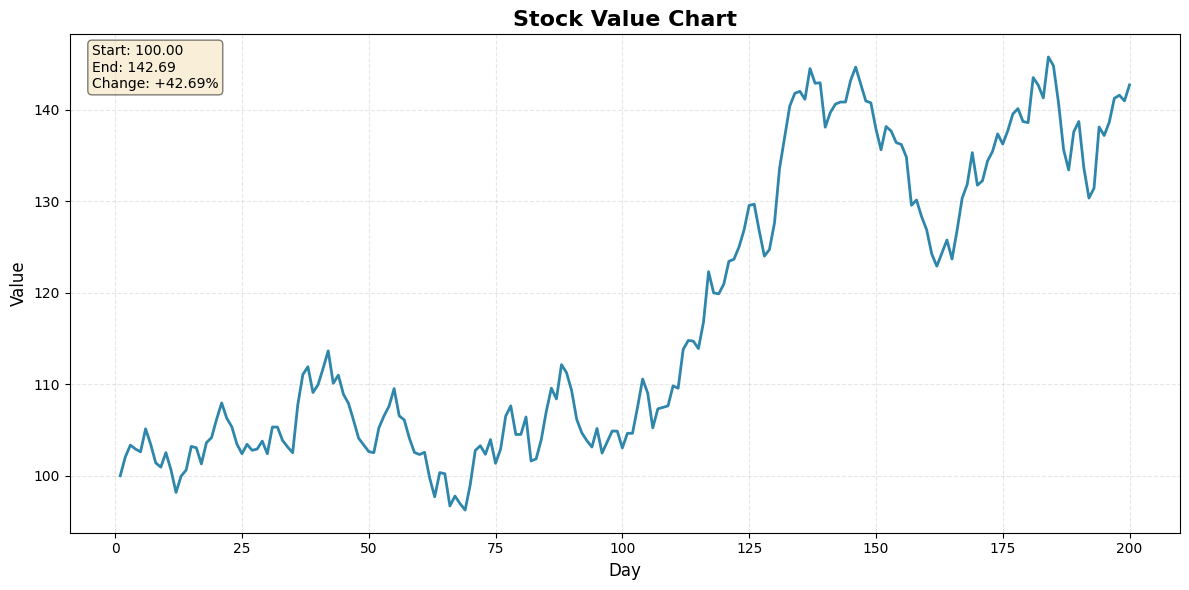

In [97]:
# Function generating data
def generate_stock(days=100, initial_price=100, volatility=0.02, drift=0.0005):
    prices = [initial_price]
    
    for i in range(1, days):
        change = np.random.normal(drift, volatility)
        new_price = prices[-1] * (1 + change)
        prices.append(new_price)
    
    df = pd.DataFrame({
        'day_number': range(1, days + 1),
        'value': prices
    })
    
    if SAVE_TO_CSV:
        df.to_csv('stock.csv', index=False)
        print("Data saved to 'stock.csv'")
    return df

# Function plotting the chart
def plot_stock_chart(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df['day_number'], df['value'], linewidth=2, color='#2E86AB')
    
    plt.title('Stock Value Chart', fontsize=16, fontweight='bold')
    plt.xlabel('Day', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.grid(True, alpha=0.3, linestyle='--')
    
    start_price = df['value'].iloc[0]
    end_price = df['value'].iloc[-1]
    change_percent = ((end_price - start_price) / start_price) * 100
    
    plt.text(0.02, 0.98, f'Start: {start_price:.2f}\nEnd: {end_price:.2f}\nChange: {change_percent:+.2f}%',
             transform=plt.gca().transAxes,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
             fontsize=10)
    
    plt.tight_layout()
    if SAVE_PLOT:
        plt.savefig('stock_chart.png', dpi=300, bbox_inches='tight')
        print("Chart saved as 'stock_chart.png'")
    plt.show()

# Usage - generate and plot:
plot_stock_chart(df)

In [98]:
def generate_multi_stocks(num_stocks, days=100, initial_price=100, volatility=0.02, drift=0.0005, start_date=datetime(2000, 1, 1), save_csv=SAVE_TO_CSV, randomly=False):
    """
    Generates random price data for multiple stocks using geometric Brownian motion.
    
    Parameters:
    - num_stocks: number of stocks to generate
    - days: number of days to generate
    - initial_price: initial price for each stock (used if random=False)
    - volatility: daily volatility (used if random=False)
    - drift: daily drift (used if random=False)
    - start_date: starting date (default: 2000-01-01)
    - save_csv: whether to save to CSV
    - random: if True, randomize parameters for each stock within config ranges
    
    Returns:
    - DataFrame with Date column and stock columns (A, B, C, ...)
    """
    
    # Generate dates
    dates = [start_date + timedelta(days=i) for i in range(days)]
    
    # Stock names: A, B, C, ...
    stock_names = [chr(65 + i) for i in range(num_stocks)]
    
    # Initialize data dict
    data = {'Date': dates}
    
    for stock in stock_names:
        if randomly:
            ip = random.uniform(INITIAL_PRICE_MIN, INITIAL_PRICE_MAX)
            vol = random.uniform(VOLATILITY_MIN, VOLATILITY_MAX)
            dr = random.uniform(DRIFT_MIN, DRIFT_MAX)
        else:
            ip = initial_price
            vol = volatility
            dr = drift
        
        prices = [ip]
        for i in range(1, days):
            change = np.random.normal(dr, vol)
            new_price = prices[-1] * (1 + change)
            prices.append(new_price)
        data[stock] = prices
    
    df = pd.DataFrame(data)
    df['Date'] = pd.to_datetime(df['Date']).dt.date  # Format as date
    
    if save_csv:
        df.to_csv('multi_stocks.csv', index=False)
        print(f"Data for {num_stocks} stocks saved to 'multi_stocks.csv'")
    
    return df

# Example usage
multi_df = generate_multi_stocks(num_stocks=10, days=10000, randomly=True)
print(multi_df.head())

         Date           A           B           C           D           E  \
0  2000-01-01  165.443982  149.396564  185.211094  137.707830  102.622129   
1  2000-01-02  172.076232  138.478493  193.297943  138.092065   98.593882   
2  2000-01-03  167.836659  107.161505  186.028830  126.453274   88.625288   
3  2000-01-04  163.041735  111.629526  203.903569  129.953476   87.193328   
4  2000-01-05  178.486626   99.400272  246.070286  127.473712   97.780606   

            F           G           H           I           J  
0  179.414313  131.434857  143.433148  150.610118  117.443680  
1  200.307657  129.833889  119.554367  183.223254  113.889181  
2  218.142862  155.679805  105.457782  179.724117  121.859887  
3  239.854704  192.647629  103.974972  214.288563  122.182974  
4  210.532588  188.062503  109.906102  154.301321  105.686775  


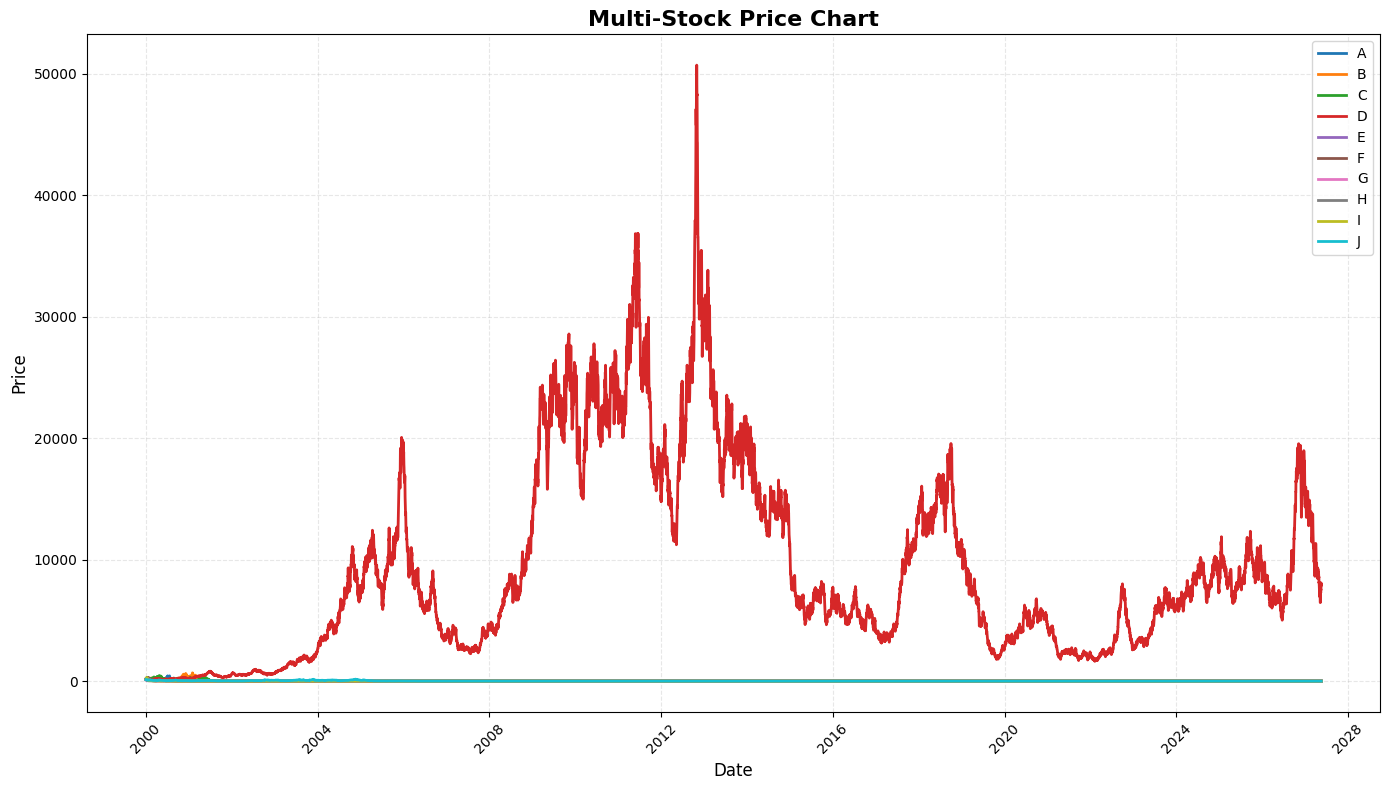

In [99]:
def plot_multi_stocks(df, save_plot=SAVE_PLOT):
    """
    Plots the price data for multiple stocks.
    
    Parameters:
    - df: DataFrame with Date and stock columns
    - save_plot: whether to save the plot
    """
    plt.figure(figsize=(14, 8))
    
    stock_columns = [col for col in df.columns if col != 'Date']
    
    for stock in stock_columns:
        plt.plot(df['Date'], df[stock], label=stock, linewidth=2)
    
    plt.title('Multi-Stock Price Chart', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    if save_plot:
        plt.savefig('multi_stocks_chart.png', dpi=300, bbox_inches='tight')
        print("Chart saved as 'multi_stocks_chart.png'")
    plt.show()

# Plot the generated data
plot_multi_stocks(multi_df)